In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import glob

import parselmouth

from parselmouth.praat import call
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv(r'C:\Users\ASUS\Downloads\Detection of parkinsons disease using voice\New_train_data.csv')

data.head()

,Subject_ID,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,...,Maximum Pitch,Number of Pulses,Number of Periods,Mean Period,Standard Deviation of Period,Fraction of Locally Unvoiced Frames,Number of Voice Breaks,Degree of Voice Breaks,UPDRS,Class_Information
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.200,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [3]:
data1=data.drop(['UPDRS', 'Subject_ID','Number of Pulses','Number of Periods','Fraction of Locally Unvoiced Frames','Median Pitch','Number of Voice Breaks','Degree of Voice Breaks','AC','Minimun Pitch','Maximum Pitch','Mean Period','Standard Deviation of Period','NTH'],axis=1)

In [4]:
data1.head()

,localJitter,localabsoluteJitter,rapJitter,ppq5Jitter,ddpJitter,localShimmer,localdbShimmer,apq3Shimmer,aqpq5Shimmer,apq11Shimmer,ddaShimmer,hnr,meanF0,stdevF0,Class_Information
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,11.130,164.781,10.421,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,17.403,193.289,14.773,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,12.212,164.768,12.981,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,11.384,203.471,10.853,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,10.653,208.440,11.499,1


In [5]:
#data1.to_csv(r'C:\Users\ASUS\Downloads\processed_results.csv', index=False)

In [6]:
data1.isnull().sum()

localJitter            0
localabsoluteJitter    0
rapJitter              0
ppq5Jitter             0
ddpJitter              0
localShimmer           0
localdbShimmer         0
apq3Shimmer            0
aqpq5Shimmer           0
apq11Shimmer           0
ddaShimmer             0
hnr                    0
meanF0                 0
stdevF0                0
Class_Information      0
dtype: int64

In [7]:
df1=data1.pop('Class_Information')

data1['Class_Information'] = df1

In [8]:
features=data1.loc[:,data1.columns!='Class_Information'].values[:,0:]
labels=data1.loc[:,'Class_Information'].values

In [9]:
#scaler=MinMaxScaler((-1,1))
#x=scaler.fit_transform(features)
#y=labels

x=features
y=labels

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=100)

In [11]:
model = XGBClassifier(eval_metric='logloss', max_depth=10, min_child_weight=2,reg_lambda = 100, reg_alpha =4)

In [12]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
              max_leaves=0, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=4, reg_lambda=100, ...)

In [13]:
# Finally, generate y_pred (predicted values for x_test)

y_pred = model.predict(x_test)

In [14]:
print(accuracy_score(y_test,y_pred)*100)

71.63461538461539


In [15]:
newinput=[[0.135,0.0000071,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,3.223,24.204,186.3,0.859]]

In [16]:
scaler1 = MinMaxScaler((-1,1))
nn = scaler1.fit_transform(newinput)
output=model.predict(nn)
output

array([0])

[[72 29]
 [30 77]]


c:\new folder\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


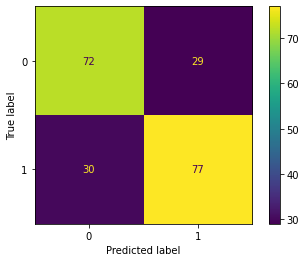

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test)
plt.show()

In [18]:
#for wave_file in glob.glob(r"C:\Users\ASUS\Downloads\26_29_09_2017_KCL\26-29_09_2017_KCL\ReadText\PD\*.wav"):
sound = parselmouth.Sound(r"C:\Users\ASUS\Downloads\Audio_Data_For_Validation-20230302T160451Z-001\Audio_Data_For_Validation\ReadText\PD\ID18_pd_4_3_3.wav")

In [19]:
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    pointProcess = call(sound, "To PointProcess (periodic, cc)", f0min, f0max)
    
    localJitter = (call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3))*100
    localabsoluteJitter = call(pointProcess, "Get jitter (local, absolute)", 0, 0, 0.0001, 0.02, 1.3)
    rapJitter = (call(pointProcess, "Get jitter (rap)", 0, 0, 0.0001, 0.02, 1.3))*100
    ppq5Jitter = (call(pointProcess, "Get jitter (ppq5)", 0, 0, 0.0001, 0.02, 1.3))*100
    ddpJitter = (call(pointProcess, "Get jitter (ddp)", 0, 0, 0.0001, 0.02, 1.3))*100
    localShimmer =  (call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    localdbShimmer = call([sound, pointProcess], "Get shimmer (local_dB)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    apq3Shimmer = (call([sound, pointProcess], "Get shimmer (apq3)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    aqpq5Shimmer = (call([sound, pointProcess], "Get shimmer (apq5)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    apq11Shimmer =  (call([sound, pointProcess], "Get shimmer (apq11)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    ddaShimmer = (call([sound, pointProcess], "Get shimmer (dda)", 0, 0, 0.0001, 0.02, 1.3, 1.6))*100
    hnr = call(harmonicity, "Get mean", 0, 0)
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation

    return localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr,meanF0, stdevF0 

In [20]:

(localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr,meanF0, stdevF0 ) = measurePitch(sound, 75, 500, "Hertz")

In [21]:
print(localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr, meanF0, stdevF0)

3.0815888599808305 0.00022095675442377114 1.524537847243539 1.5256097629338132 4.573613541730618 11.060115147787505 1.0846940110961125 5.293528908153386 6.430329243631773 10.660451003058489 15.880586724460159 16.03189475079335 140.04466685862096 47.13026000854531


In [22]:
newinput=[[localJitter, localabsoluteJitter, rapJitter, ppq5Jitter, ddpJitter, localShimmer, localdbShimmer, apq3Shimmer, aqpq5Shimmer, apq11Shimmer, ddaShimmer, hnr, meanF0, stdevF0]]

In [23]:
#scaler1 = MinMaxScaler((-1,1))
#nn = scaler1.fit_transform(newinput)
output = model.predict(newinput)
output

array([0])

In [24]:
import librosa
sound = parselmouth.sound(voiceID)
x, sr = librosa.load(sound)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()

AttributeError: module 'parselmouth' has no attribute 'sound'

In [ ]:
pip install librosa

In [ ]:
audio = r"C:\Users\ASUS\Downloads\26_29_09_2017_KCL\26-29_09_2017_KCL\ReadText\HC\ID36_hc_0_0_0.wav"
x, sr = librosa.load(audio)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize = (10, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
plt.colorbar()